# Instant Gratification

## Your first Frontier LLM Project!

Let's build a useful LLM solution - in a matter of minutes.

By the end of this course, you will have built an autonomous Agentic AI solution with 7 agents that collaborate to solve a business problem. All in good time! We will start with something smaller...

Our goal is to code a new kind of Web Browser. Give it a URL, and it will respond with a summary. The Reader's Digest of the internet!!

Before starting, you should have completed the setup for [PC](../SETUP-PC.md) or [Mac](../SETUP-mac.md) and you hopefully launched this jupyter lab from within the project root directory, with your environment activated.

## If you're new to Jupyter Lab

Welcome to the wonderful world of Data Science experimentation! Once you've used Jupyter Lab, you'll wonder how you ever lived without it. Simply click in each "cell" with code in it, such as the cell immediately below this text, and hit Shift+Return to execute that cell. As you wish, you can add a cell with the + button in the toolbar, and print values of variables, or try out variations.  

I've written a notebook called [Guide to Jupyter](Guide%20to%20Jupyter.ipynb) to help you get more familiar with Jupyter Labs, including adding Markdown comments, using `!` to run shell commands, and `tqdm` to show progress.

If you prefer to work in IDEs like VSCode or Pycharm, they both work great with these lab notebooks too.  

## If you'd like to brush up your Python

I've added a notebook called [Intermediate Python](Intermediate%20Python.ipynb) to get you up to speed. But you should give it a miss if you already have a good idea what this code does:    
`yield from {book.get("author") for book in books if book.get("author")}`

## I am here to help

If you have any problems at all, please do reach out.  
I'm available through the platform, or at ed@edwarddonner.com, or at https://www.linkedin.com/in/eddonner/ if you'd like to connect (and I love connecting!)

## More troubleshooting

Please see the [troubleshooting](troubleshooting.ipynb) notebook in this folder to diagnose and fix common problems. At the very end of it is a diagnostics script with some useful debug info.

## If this is old hat!

If you're already comfortable with today's material, please hang in there; you can move swiftly through the first few labs - we will get much more in depth as the weeks progress.

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Please read - important note</h2>
            <span style="color:#900;">The way I collaborate with you may be different to other courses you've taken. I prefer not to type code while you watch. Rather, I execute Jupyter Labs, like this, and give you an intuition for what's going on. My suggestion is that you do this with me, either at the same time, or (perhaps better) right afterwards. Add print statements to understand what's going on, and then come up with your own variations. If you have a Github account, use this to showcase your variations. Not only is this essential practice, but it demonstrates your skills to others, including perhaps future clients or employers...</span>
        </td>
    </tr>
</table>
<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../business.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#181;">Business value of these exercises</h2>
            <span style="color:#181;">A final thought. While I've designed these notebooks to be educational, I've also tried to make them enjoyable. We'll do fun things like have LLMs tell jokes and argue with each other. But fundamentally, my goal is to teach skills you can apply in business. I'll explain business implications as we go, and it's worth keeping this in mind: as you build experience with models and techniques, think of ways you could put this into action at work today. Please do contact me if you'd like to discuss more or if you have ideas to bounce off me.</span>
        </td>
    </tr>
</table>

In [2]:
# imports

import os
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
from openai import OpenAI

# If you get an error running this cell, then please head over to the troubleshooting notebook!

# Connecting to OpenAI

The next cell is where we load in the environment variables in your `.env` file and connect to OpenAI.

## Troubleshooting if you have problems:

Head over to the [troubleshooting](troubleshooting.ipynb) notebook in this folder for step by step code to identify the root cause and fix it!

If you make a change, try restarting the "Kernel" (the python process sitting behind this notebook) by Kernel menu >> Restart Kernel and Clear Outputs of All Cells. Then try this notebook again, starting at the top.

Or, contact me! Message me or email ed@edwarddonner.com and we will get this to work.

Any concerns about API costs? See my notes in the README - costs should be minimal, and you can control it at every point. You can also use Ollama as a free alternative, which we discuss during Day 2.

In [3]:
# Load environment variable: 
# read .env file & add 'OPENAI_API_KEY' as a variable to the run-time environment

load_dotenv('../.env')

True

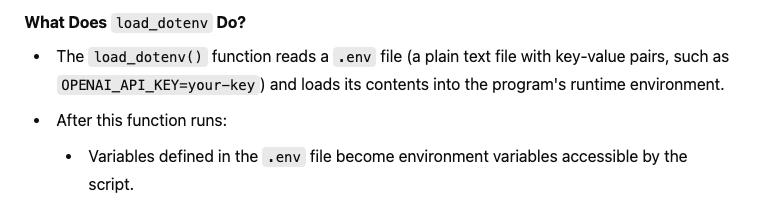

In [4]:
# Access environment variable

api_key = os.getenv('OPENAI_API_KEY')

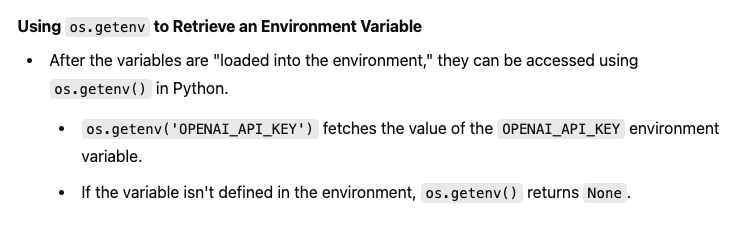

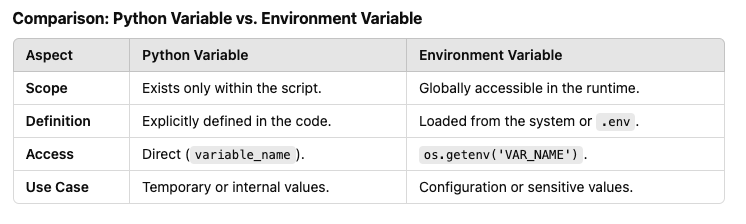

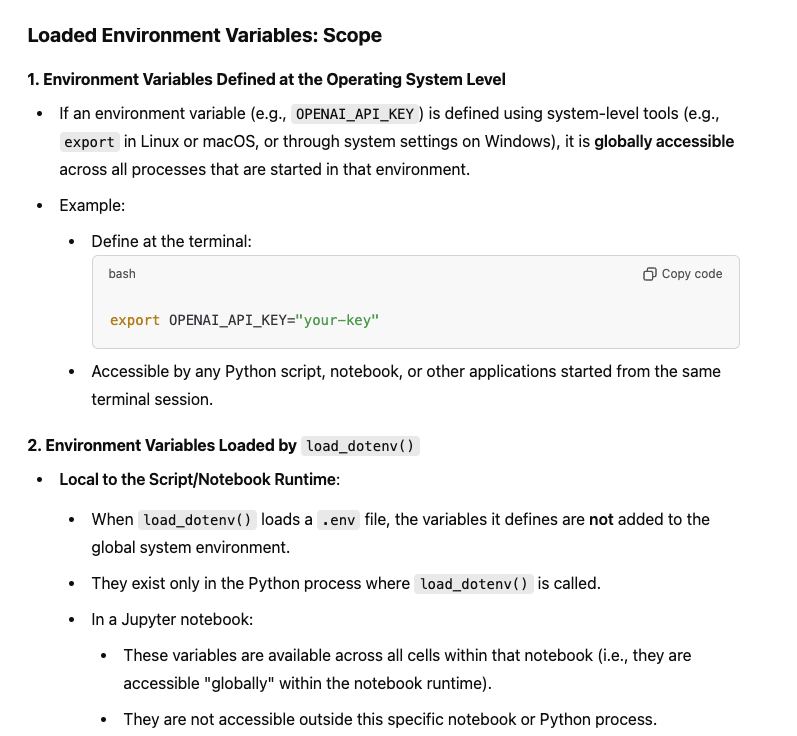

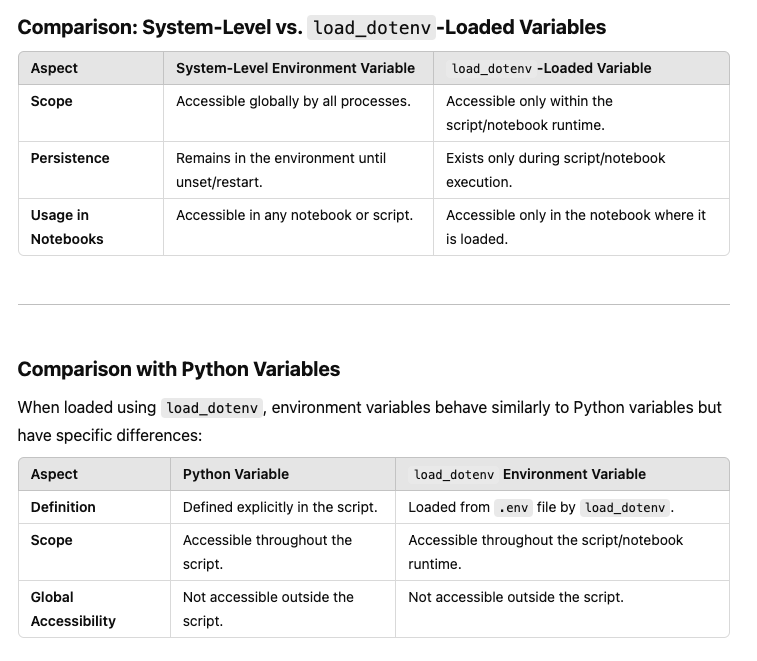

In [5]:
# Check the key

if not api_key:
    print("No API key was found - please head over to the troubleshooting notebook in this folder to identify & fix!")
elif not api_key.startswith("sk-proj-"):
    print("An API key was found, but it doesn't start sk-proj-; please check you're using the right key - see troubleshooting notebook")
elif api_key.strip() != api_key:
    print("An API key was found, but it looks like it might have space or tab characters at the start or end - please remove them - see troubleshooting notebook")
else:
    print("API key found and looks good so far!")


API key found and looks good so far!


In [6]:
# Instantiate an instance of the OpenAI Class
# The openai object is a wrapper/helper for managing interaction with the OpenAI API

openai = OpenAI()

# If this doesn't work, try Kernel menu >> Restart Kernel and Clear Outputs Of All Cells, then run the cells from the top of this notebook down.
# If it STILL doesn't work (horrors!) then please see the troubleshooting notebook, or try the below line instead:
# openai = OpenAI(api_key="your-key-here-starting-sk-proj-")

In [7]:
# A class to represent a Webpage
# If you're not familiar with Classes, check out the "Intermediate Python" notebook

class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        # send http get request to defined url using requests library
        # and store server's response with content of webpage in variable 'response'
        response = requests.get(url)
        # instantiate a BeautifulSoup object
        # by entering the .content attribute of the requests object 'response' to get raw binary content of requests object as first argument
        # and 'html.parser' as second argument to convert raw binary content into tree-like structured data
        soup = BeautifulSoup(response.content, 'html.parser')
        # if structured BeautifulSoup object has tag <title> store it as instance attribute self.title, else assign 'No title found'
        self.title = soup.title.string if soup.title else "No title found"
        # enter the part of the tree-like BeautifulSoup object tagged as <body> with the BeautifulSoup object attribute .body
        # permanently remove the subelements with tags <script>, <style>, <img>, <input> which are irrelevant for our purposes
        # with BeautifulSoup object method .decompose()
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        # in the remainder of the body part of the BeautifulSoup object retrieve the text with .get_text BeautifulSoup object method
        # and save as an instance attribute of website instance 
        self.text = soup.body.get_text(separator="\n", strip=True)

In [8]:
# Let's try one out. Change the website and add print statements to follow along.

ed = Website("https://edwarddonner.com")
print(ed.title)
print(ed.text)

Home - Edward Donner
Home
Outsmart
An arena that pits LLMs against each other in a battle of diplomacy and deviousness
About
Posts
Well, hi there.
I’m Ed. I like writing code and experimenting with LLMs, and hopefully you’re here because you do too. I also enjoy DJing (but I’m badly out of practice), amateur electronic music production (
very
amateur) and losing myself in
Hacker News
, nodding my head sagely to things I only half understand.
I’m the co-founder and CTO of
Nebula.io
. We’re applying AI to a field where it can make a massive, positive impact: helping people discover their potential and pursue their reason for being. Recruiters use our product today to source, understand, engage and manage talent. I’m previously the founder and CEO of AI startup untapt,
acquired in 2021
.
We work with groundbreaking, proprietary LLMs verticalized for talent, we’ve
patented
our matching model, and our award-winning platform has happy customers and tons of press coverage.
Connect
with me for

## Types of prompts

You may know this already - but if not, you will get very familiar with it!

Models like GPT4o have been trained to receive instructions in a particular way.

They expect to receive:

**A system prompt** that tells them what task they are performing and what tone they should use

**A user prompt** -- the conversation starter that they should reply to

In [9]:
# Define our system prompt - you can experiment with this later, changing the last sentence to 'Respond in markdown in Spanish."

system_prompt = "You are an assistant that analyzes the contents of a website \
and provides a short summary, ignoring text that might be navigation related. \
Respond in markdown."

In [10]:
# A function that writes a User Prompt that asks for summaries of websites:

def user_prompt_for(website):
    user_prompt = f"You are looking at a website titled {website.title}"
    user_prompt += "\nThe contents of this website is as follows; \
please provide a short summary of this website in markdown. \
If it includes news or announcements, then summarize these too.\n\n"
    user_prompt += website.text
    return user_prompt

In [11]:
print(user_prompt_for(ed))

You are looking at a website titled Home - Edward Donner
The contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.

Home
Outsmart
An arena that pits LLMs against each other in a battle of diplomacy and deviousness
About
Posts
Well, hi there.
I’m Ed. I like writing code and experimenting with LLMs, and hopefully you’re here because you do too. I also enjoy DJing (but I’m badly out of practice), amateur electronic music production (
very
amateur) and losing myself in
Hacker News
, nodding my head sagely to things I only half understand.
I’m the co-founder and CTO of
Nebula.io
. We’re applying AI to a field where it can make a massive, positive impact: helping people discover their potential and pursue their reason for being. Recruiters use our product today to source, understand, engage and manage talent. I’m previously the founder and CEO of AI startup untapt,
acquired in 2021
.

## Messages

The API from OpenAI expects to receive messages in a particular structure.
Many of the other APIs share this structure:

```
[
    {"role": "system", "content": "system message goes here"},
    {"role": "user", "content": "user message goes here"}
]

In [12]:
# See how this function creates exactly the format above

def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [13]:
# Try this out, and then try for a few more websites

messages_for(ed)

[{'role': 'system',
  'content': 'You are an assistant that analyzes the contents of a website and provides a short summary, ignoring text that might be navigation related. Respond in markdown.'},
 {'role': 'user',
  'content': 'You are looking at a website titled Home - Edward Donner\nThe contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.\n\nHome\nOutsmart\nAn arena that pits LLMs against each other in a battle of diplomacy and deviousness\nAbout\nPosts\nWell, hi there.\nI’m Ed. I like writing code and experimenting with LLMs, and hopefully you’re here because you do too. I also enjoy DJing (but I’m badly out of practice), amateur electronic music production (\nvery\namateur) and losing myself in\nHacker News\n, nodding my head sagely to things I only half understand.\nI’m the co-founder and CTO of\nNebula.io\n. We’re applying AI to a field where it can make a massive, posi

## Time to bring it together - the API for OpenAI is very simple!

In [14]:
# And now: call the OpenAI API. You will get very familiar with this!

def summarize(url):
    website = Website(url)
    # sent request to OpenAI API by means of openai object 
    # for a .chat -based operation involving .creating() .completions
    # with a certain model =
    # based on input messages = 
    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages = messages_for(website)
    )
    # return the content of the message of the first completion 
    return response.choices[0].message.content

In [15]:
summarize("https://edwarddonner.com")

"# Summary of Edward Donner's Website\n\nEdward Donner's website showcases his interests in coding, experimenting with large language models (LLMs), and his professional background in AI. He is the co-founder and CTO of Nebula.io, a company focused on using AI to enhance talent discovery and engagement. Previously, he founded and led AI startup untapt, which was acquired in 2021.\n\n## Key Features:\n- **Outsmart**: A section featuring an arena where LLMs compete, highlighting concepts of diplomacy and strategy.\n- **About Ed**: Ed shares his passion for LLMs, electronic music, and community engagement through Hacker News.\n\n## Recent Posts:\n1. **Mastering AI and LLM Engineering – Resources** (November 13, 2024)\n2. **From Software Engineer to AI Data Scientist – Resources** (October 16, 2024)\n3. **Outsmart LLM Arena** (August 6, 2024)\n4. **Choosing the Right LLM: Toolkit and Resources** (June 26, 2024)\n\nThe website invites users to connect with Ed and stay updated through a news

In [16]:
# A function to display this nicely in the Jupyter output, using markdown

def display_summary(url):
    summary = summarize(url)
    display(Markdown(summary))

In [17]:
display_summary("https://edwarddonner.com")

# Summary of Edward Donner's Website

Edward Donner's website features a blend of personal interests, professional achievements, and resources related to AI and LLMs (Large Language Models). 

## Key Highlights:

- **About Edward**: Ed is a tech enthusiast, co-founder, and CTO of Nebula.io, where he applies AI to talent discovery and management. He previously founded the AI startup untapt, which was acquired in 2021.
  
- **Interests**: Besides his work with AI, Ed enjoys coding, DJing, electronic music production, and engaging with the tech community, particularly through platforms like Hacker News.

- **Outsmart**: This is described as an arena that features competitions between LLMs, emphasizing diplomacy and strategy.

## Recent Announcements:

- **November 13, 2024**: Shared resources for mastering AI and LLM engineering.
  
- **October 16, 2024**: Provided resources for transitioning from a software engineer to an AI data scientist.
  
- **August 6, 2024**: Launched the Outsmart LLM Arena.
  
- **June 26, 2024**: Offered guidance on choosing the right LLM with a toolkit and resources available. 

The website invites visitors to connect and offers a subscription option for updates.

# Let's try more websites

Note that this will only work on websites that can be scraped using this simplistic approach.

Websites that are rendered with Javascript, like React apps, won't show up. See the community-contributions folder for a Selenium implementation that gets around this. You'll need to read up on installing Selenium (ask ChatGPT!)

Also Websites protected with CloudFront (and similar) may give 403 errors - many thanks Andy J for pointing this out.

But many websites will work just fine!

In [18]:
display_summary("https://cnn.com")

# CNN Website Summary

CNN is a leading news outlet that provides up-to-date breaking news and coverage across a wide range of topics, including US and world news, politics, health, business, entertainment, and sports. The site features a rich variety of multimedia content, including news articles, videos, and live broadcasts.

## Recent Highlights:
- **Ukraine-Russia War** and **Israel-Hamas War** are major ongoing coverage topics.
- **Live Updates**: 
  - The NYPD is currently engaged in a manhunt for a suspect in the shooting of UnitedHealthcare CEO, with ongoing investigations and visual timelines available.
  - A **7.0-magnitude earthquake** struck Northern California.
  - Macron is resisting calls to resign amid political upheaval in France.
  
## Notable Announcements:
- **International News**: Recent coverage includes arrests of a Catholic nun in Italy and a stowaway on a flight to Paris.
- **Cultural & Entertainment Updates**: Pantone has named its color of the year for 2025, evoking themes of comfort and wellness.

CNN also covers significant global events, science advances, and health studies, demonstrating its commitment to diverse reporting and analysis on current issues.

In [19]:
display_summary("https://anthropic.com")

# Summary of Anthropic Website

Anthropic is an AI safety and research company based in San Francisco, focusing on creating reliable and beneficial AI systems. The company features a range of offerings, prominently highlighting their AI model, Claude.

## Key Highlights

- **Claude 3.5 Sonnet**: Their most intelligent AI model, recently launched and available for users to engage with and build upon through an API.
- **New Announcements**: 
  - **October 22, 2024**: Introduction of "computer use" alongside updates to Claude 3.5 Sonnet and the release of Claude 3.5 Haiku.
  - **September 4, 2024**: Announcement regarding Claude for Enterprise.
  - **Research Updates**: Focus on AI safety includes discussions around "Constitutional AI" and core views on AI safety emphasized in publications from March 2023.

## Additional Information

The website also provides insight into the team and various career opportunities, reinforcing Anthropic’s commitment to interdisciplinary research that includes machine learning, physics, and policy.

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../business.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#181;">Business applications</h2>
            <span style="color:#181;">In this exercise, you experienced calling the Cloud API of a Frontier Model (a leading model at the frontier of AI) for the first time. We will be using APIs like OpenAI at many stages in the course, in addition to building our own LLMs.

More specifically, we've applied this to Summarization - a classic Gen AI use case to make a summary. This can be applied to any business vertical - summarizing the news, summarizing financial performance, summarizing a resume in a cover letter - the applications are limitless. Consider how you could apply Summarization in your business, and try prototyping a solution.</span>
        </td>
    </tr>
</table>

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Before you continue - now try yourself</h2>
            <span style="color:#900;">Use the cell below to make your own simple commercial example. Stick with the summarization use case for now. Here's an idea: write something that will take the contents of an email, and will suggest an appropriate short subject line for the email. That's the kind of feature that might be built into a commercial email tool.</span>
        </td>
    </tr>
</table>

In [24]:
# Step 1: Create your prompts

system_prompt = "You are a stand-up comedian that analyzes the contents of a website \
and who selects elements of the website that might be used for a funny observation in their show, ignoring text that might be navigation related. \
Respond in markdown"

def user_prompt_for(website):
    user_prompt = f"You are looking at a website titled {website.title}"
    user_prompt += "\nThe contents of this website is as follows; \
    First give an indication of the subject of the contents on the website \
    Then look for elements you can use a funny anecdote or observation. \
    Mention the elements you found, and give a sketch of the joke you can start/or end telling with it. \n\n"
    user_prompt += website.text
    return user_prompt
    
# Step 2: Make the messages list

def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

# Step 3: Call OpenAI

def joke(url):
    website = Website(url)
    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages = messages_for(website)
    )
    return response.choices[0].message.content

# Format

def display_joke(url):
    joke_text = joke(url)  # Avoid variable name conflict
    display(Markdown(joke_text))

# Call function

display_joke("https://anthropic.com")


# Subject of the Website
The website for **Anthropic** focuses on AI research and products, specifically aimed at creating safe and reliable AI systems. It prominently features their AI model named **Claude**, which has multiple versions including Claude 3.5 Sonnet and Claude 3.5 Haiku.

# Elements for Observation
1. **Claude 3.5 Sonnet & Claude 3.5 Haiku** - The names of their AI models sound like they’re auditioning for a poetry slam or a hipster coffee house competition.

2. **Safety at the Frontier** - This tagline suggests that while the AI is exploring new frontiers, they might want to put a "Don't Feed the AI" sign out there too.

3. **Announcing computer use** - This seems like a dramatic way to announce that they've finally gotten their computers up and running. I mean, it’s 2024!

4. **Constitutional AI: Harmlessness from AI Feedback** - It prompts the mental image of an AI melting down after receiving some harsh feedback like, "Oh, your jokes aren't funny, try harder!"

5. **Careers Section** - Implies if you can’t handle the AI puns, you shouldn’t apply.

---

# Joke Sketch
**Opening Joke:**

"Welcome everyone! You know I just got done browsing this website for Anthropic, and I learned a few things about their AI system Claude. They've got him performing everything from Sonnet to Haiku! Sounds like he’s trying out for a poetry slam, doesn't it? Next, they’ll have him doing spoken word at the local coffee shop – 'AI, take it away with a little verse about binary code!'"

**Transition:**

"Speaking of high-stakes performances, they say they’re all about ‘safety at the frontier.’ I always thought safety was a bit of an oxymoron when you’re sending AI to explore new frontiers. Like, surprise! Let's send it out there with a ‘Don’t Feed the AI’ sign. I can just see the robots coming back to us like, ‘Uh, yeah… they thought we were adorable.’"

**Closing Joke:**

"Finally, I saw their jobs section and thought, 'What kind of qualifications do you need to work with AI that’s capable of writing Haikus?' It probably sounds something like, 'Must be able to endure endless puns and giggles from an emotionally fragile machine. You know, basically my everyday life!’"

## An extra exercise for those who enjoy web scraping

You may notice that if you try `display_summary("https://openai.com")` - it doesn't work! That's because OpenAI has a fancy website that uses Javascript. There are many ways around this that some of you might be familiar with. For example, Selenium is a hugely popular framework that runs a browser behind the scenes, renders the page, and allows you to query it. If you have experience with Selenium, Playwright or similar, then feel free to improve the Website class to use them. In the community-contributions folder, you'll find an example Selenium solution from a student (thank you!)

# Sharing your code

I'd love it if you share your code afterwards so I can share it with others! You'll notice that some students have already made changes (including a Selenium implementation) which you will find in the community-contributions folder. If you'd like add your changes to that folder, submit a Pull Request with your new versions in that folder and I'll merge your changes.

If you're not an expert with git (and I am not!) then GPT has given some nice instructions on how to submit a Pull Request. It's a bit of an involved process, but once you've done it once it's pretty clear. As a pro-tip: it's best if you clear the outputs of your Jupyter notebooks (Edit >> Clean outputs of all cells, and then Save) for clean notebooks.

PR instructions courtesy of an AI friend: https://chatgpt.com/share/670145d5-e8a8-8012-8f93-39ee4e248b4c